In [1]:
# lets fisrt prepare data for the algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


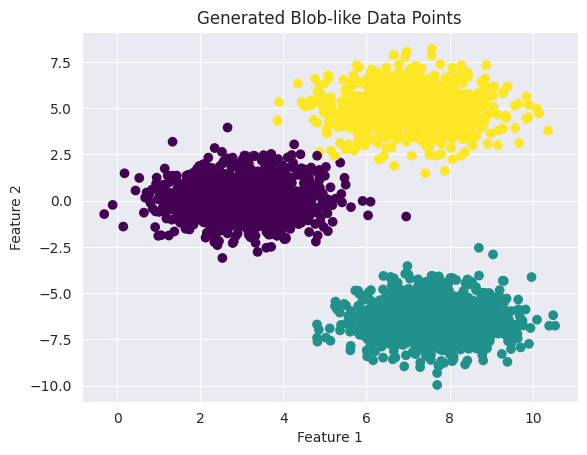

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set the random seed for reproducibility
np.random.seed(42)

# Generate blob-like data
num_samples = 3000  # Total number of data points
num_features = 2   # Number of features (dimensions)
num_clusters = 3   # Number of clusters

# Create the data
data, labels = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_clusters, random_state=18)

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Generated Blob-like Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [12]:
data

array([[ 6.18010552, -6.22304423],
       [ 8.41303451,  4.99831695],
       [ 3.68510215,  1.15056117],
       ...,
       [ 6.25060608,  6.14553048],
       [ 6.98517403,  5.15827211],
       [ 6.21971075,  5.7941706 ]], shape=(3000, 2))

In [ ]:
# our data is ready


Steps for llyod method
- choose k centroid
- assign each data point to the nearest centroid
- after each data point is assigned to some centroid take mean of each data point in the same centroid
- this will give us the new centroid
- now repeat everything

In [15]:
centroids = data[np.random.choice(len(data), 3, replace=False)]
centroids

array([[ 9.21445396, -5.47293643],
       [ 2.33717143,  0.58015577],
       [ 7.82697261, -5.44577501]])

In [17]:
assign_to = np.zeros(len(data), dtype=int)
assign_to

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [18]:
#funtion to calculate distance
def calculate_distances(data , centroids):
    result = np.zeros((len(data), 3))

    for i in range(len(data)):
        data_point = data[i]
        for j in range(len(centroids)):
            centre =centroids[j]

            sq_dis = 0
            for k in range(len(data_point)):
                sq_dis += (data_point[k]-centre[k])**2


            sq_dis = sq_dis ** 0.5

            result[i,j] = sq_dis


    return result


print(calculate_distances(data, centroids))

[[ 3.12568907  7.81355698  1.82107624]
 [10.501877    7.5124071  10.46052223]
 [ 8.62811983  1.46365281  7.78888579]
 ...
 [11.99054493  6.80355543 11.69800387]
 [10.86242533  6.52403843 10.63740759]
 [11.65830981  6.50077398 11.35427972]]


In [22]:
def assign_clusters(assign_to, distances):
    for i in range(len(distances)):
        row = distances[i]
        min_index = np.argmin(row)
        assign_to[i] = min_index

In [23]:


for i in range(7):
    distances = calculate_distances(data, centroids)
    assign_clusters(assign_to, distances)
    print(f"Iteration {i+1}:")
    print("Distances:\n", distances)
    print("Assignments:", assign_to)

    # Update centroids (this step is missing in your original code)
    for c in range(len(centroids)):
        cluster_points = data[assign_to == c]
        if len(cluster_points) > 0:
            centroids[c] = cluster_points.mean(axis=0)

    print("Updated Centroids:\n", centroids)
    print("-" * 40)


     # Step 3: Plot clusters and centroids



Iteration 1:
Distances:
 [[ 3.12568907  7.81355698  1.82107624]
 [10.501877    7.5124071  10.46052223]
 [ 8.62811983  1.46365281  7.78888579]
 ...
 [11.99054493  6.80355543 11.69800387]
 [10.86242533  6.52403843 10.63740759]
 [11.65830981  6.50077398 11.35427972]]
Assignments: [2 1 1 ... 1 1 1]
Updated Centroids:
 [[ 9.01957274 -6.40844683]
 [ 5.03624401  2.56612651]
 [ 7.27067602 -6.41926716]]
----------------------------------------
Iteration 2:
Distances:
 [[ 2.84551369  8.8632918   1.10808278]
 [11.4228783   4.16152189 11.47458974]
 [ 9.25176623  1.95688772  8.3760755 ]
 ...
 [12.85571946  3.77978942 12.6061367 ]
 [11.74426521  3.24307678 11.58105897]
 [12.51970844  3.43814808 12.2585721 ]]
Assignments: [2 1 1 ... 1 1 1]
Updated Centroids:
 [[ 8.77550459 -6.4207771 ]
 [ 5.03928653  2.5699195 ]
 [ 7.12263212 -6.41415359]]
----------------------------------------
Iteration 3:
Distances:
 [[ 2.6029204   8.8666611   0.96170639]
 [11.42484545  4.15683649 11.48519143]
 [ 9.12345111  1.96

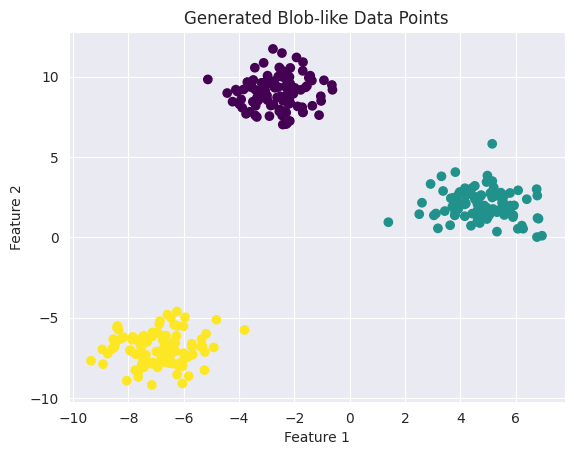

Iteration 1:
Distances:
 [[15.52677624  1.48231925 15.25641635]
 [15.51687991  1.33040634 15.31402071]
 [ 7.59095843 15.0403643   9.22882755]
 [ 0.44747818 14.63199287  1.79224879]
 [16.81965359  2.64137472 16.63912322]
 [ 1.76438426 14.73517218  0.7393872 ]
 [ 9.16746917 16.37405225 10.83747952]
 [ 1.73265401 14.14139746  0.14452025]
 [ 9.252903   15.65524915 10.88480362]
 [10.34283672 16.32562748 11.98151084]
 [10.76979622 17.61422571 12.45252812]
 [ 1.80969    14.02387627  0.10348452]
 [ 7.63163005 14.14166736  9.20234087]
 [ 9.84402709 15.22553398 11.43264244]
 [15.4256537   1.26391321 15.19964742]
 [ 9.33370187 15.46481344 10.95219392]
 [15.84015512  1.80898421 15.72467769]
 [ 1.58152552 12.67098252  2.44396932]
 [ 9.64538864 16.91670864 11.32661184]
 [10.29234729 18.2240467  11.99734173]
 [ 7.61694769 15.53147871  9.28223295]
 [ 9.41664944 16.30501703 11.07786673]
 [ 1.85497758 14.84012655  0.84145644]
 [14.84651295  0.77132311 14.60630373]
 [ 9.06139921 15.38744264 10.68267601]


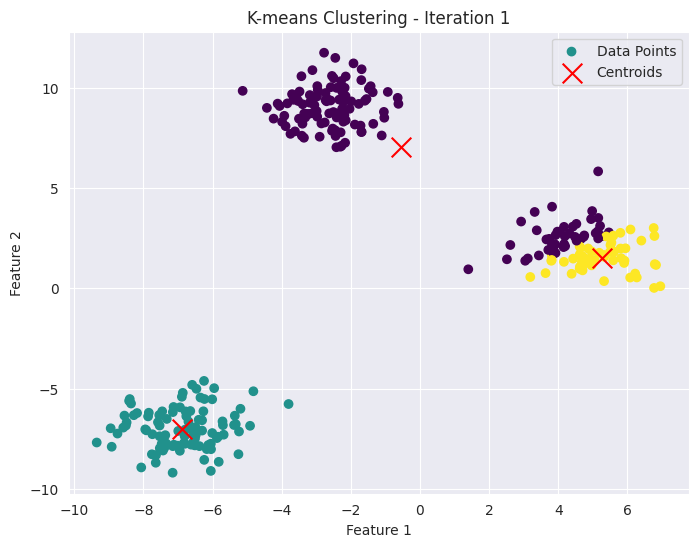

Iteration 2:
Distances:
 [[16.26247376  0.87384313 15.64409412]
 [16.01716169  0.90100321 15.70395232]
 [ 1.36860127 15.66471908  9.36285827]
 [ 6.35728564 15.13105904  1.76162509]
 [17.12086814  2.22581816 17.02946535]
 [ 7.98938392 15.18849291  0.36369829]
 [ 2.96136431 17.00308591 10.94651394]
 [ 7.93999857 14.59225939  0.24880439]
 [ 3.02856646 16.28537982 11.0233672 ]
 [ 4.10851353 16.95632647 12.11575699]
 [ 4.60594846 18.24492709 12.54836792]
 [ 7.99334133 14.47239912  0.37000503]
 [ 1.75874977 14.7679082   9.37379597]
 [ 3.72107014 15.85622515 11.59658503]
 [16.01621644  0.75147291 15.5888955 ]
 [ 3.13461514 16.09521993 11.09923351]
 [15.99964156  1.63039491 16.11657582]
 [ 5.8153026  13.18442735  2.73051408]
 [ 3.48385872 17.5463038  11.42422969]
 [ 4.38404292 18.85328996 12.05731662]
 [ 1.4058822  16.15475937  9.39541002]
 [ 3.18912144 16.93483926 11.1947346 ]
 [ 8.07020362 15.29181349  0.4546681 ]
 [15.54620417  0.1593527  14.9952145 ]
 [ 2.85902816 16.01741996 10.82792218]


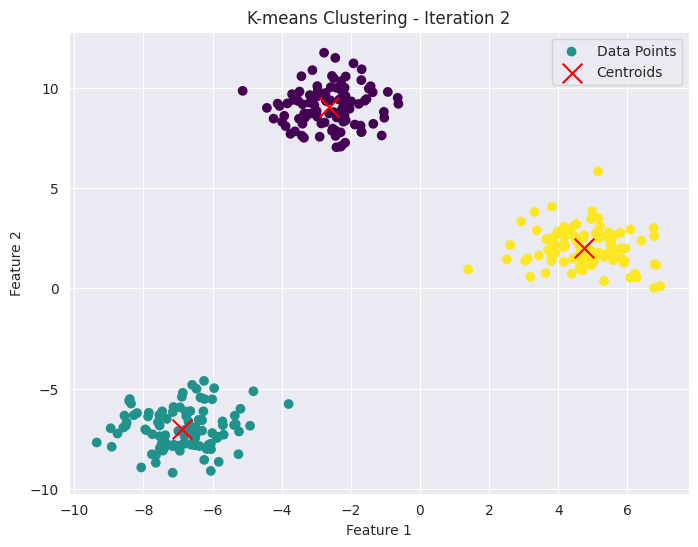

Iteration 3:
Distances:
 [[17.42111457  0.87384313 15.522625  ]
 [17.08911972  0.90100321 15.55503779]
 [ 1.5680663  15.66471908  8.65069655]
 [ 9.24334253 15.13105904  1.10996953]
 [18.06045041  2.22581816 16.87347954]
 [10.88058987 15.18849291  0.77595426]
 [ 0.46378589 17.00308591 10.23562638]
 [10.83305662 14.59225939  0.67441605]
 [ 0.41511947 16.28537982 10.31131172]
 [ 1.23795376 16.95632647 11.40356884]
 [ 1.88453686 18.24492709 11.83961524]
 [10.88521086 14.47239912  0.77187016]
 [ 2.0166206  14.7679082   8.66651771]
 [ 1.36747356 15.85622515 10.88735011]
 [17.1258718   0.75147291 15.44919326]
 [ 0.67934907 16.09521993 10.3877222 ]
 [16.92742254  1.63039491 15.9332251 ]
 [ 8.65620514 13.18442735  2.13756858]
 [ 0.96503394 17.5463038  10.7150658 ]
 [ 2.27508944 18.85328996 11.3584255 ]
 [ 1.53869539 16.15475937  8.68398631]
 [ 0.37661395 16.93483926 10.48309328]
 [10.96015562 15.29181349  0.88728556]
 [16.72268378  0.1593527  14.86028568]
 [ 0.60018235 16.01741996 10.11627427]


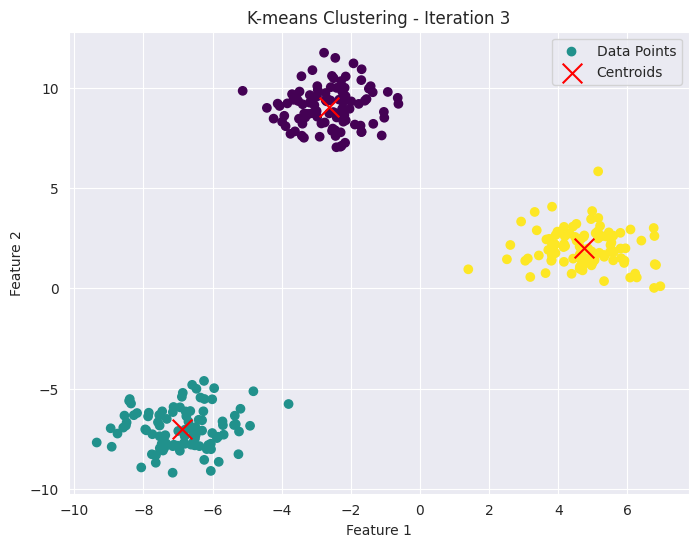

Iteration 4:
Distances:
 [[17.42111457  0.87384313 15.522625  ]
 [17.08911972  0.90100321 15.55503779]
 [ 1.5680663  15.66471908  8.65069655]
 [ 9.24334253 15.13105904  1.10996953]
 [18.06045041  2.22581816 16.87347954]
 [10.88058987 15.18849291  0.77595426]
 [ 0.46378589 17.00308591 10.23562638]
 [10.83305662 14.59225939  0.67441605]
 [ 0.41511947 16.28537982 10.31131172]
 [ 1.23795376 16.95632647 11.40356884]
 [ 1.88453686 18.24492709 11.83961524]
 [10.88521086 14.47239912  0.77187016]
 [ 2.0166206  14.7679082   8.66651771]
 [ 1.36747356 15.85622515 10.88735011]
 [17.1258718   0.75147291 15.44919326]
 [ 0.67934907 16.09521993 10.3877222 ]
 [16.92742254  1.63039491 15.9332251 ]
 [ 8.65620514 13.18442735  2.13756858]
 [ 0.96503394 17.5463038  10.7150658 ]
 [ 2.27508944 18.85328996 11.3584255 ]
 [ 1.53869539 16.15475937  8.68398631]
 [ 0.37661395 16.93483926 10.48309328]
 [10.96015562 15.29181349  0.88728556]
 [16.72268378  0.1593527  14.86028568]
 [ 0.60018235 16.01741996 10.11627427]


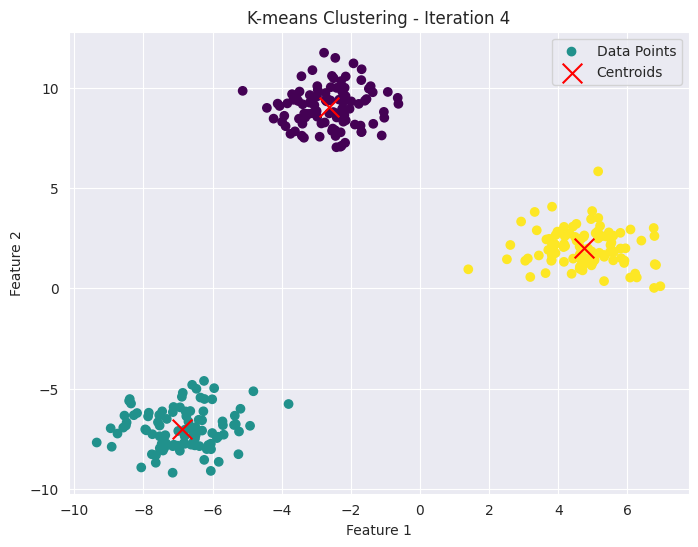

Iteration 5:
Distances:
 [[17.42111457  0.87384313 15.522625  ]
 [17.08911972  0.90100321 15.55503779]
 [ 1.5680663  15.66471908  8.65069655]
 [ 9.24334253 15.13105904  1.10996953]
 [18.06045041  2.22581816 16.87347954]
 [10.88058987 15.18849291  0.77595426]
 [ 0.46378589 17.00308591 10.23562638]
 [10.83305662 14.59225939  0.67441605]
 [ 0.41511947 16.28537982 10.31131172]
 [ 1.23795376 16.95632647 11.40356884]
 [ 1.88453686 18.24492709 11.83961524]
 [10.88521086 14.47239912  0.77187016]
 [ 2.0166206  14.7679082   8.66651771]
 [ 1.36747356 15.85622515 10.88735011]
 [17.1258718   0.75147291 15.44919326]
 [ 0.67934907 16.09521993 10.3877222 ]
 [16.92742254  1.63039491 15.9332251 ]
 [ 8.65620514 13.18442735  2.13756858]
 [ 0.96503394 17.5463038  10.7150658 ]
 [ 2.27508944 18.85328996 11.3584255 ]
 [ 1.53869539 16.15475937  8.68398631]
 [ 0.37661395 16.93483926 10.48309328]
 [10.96015562 15.29181349  0.88728556]
 [16.72268378  0.1593527  14.86028568]
 [ 0.60018235 16.01741996 10.11627427]


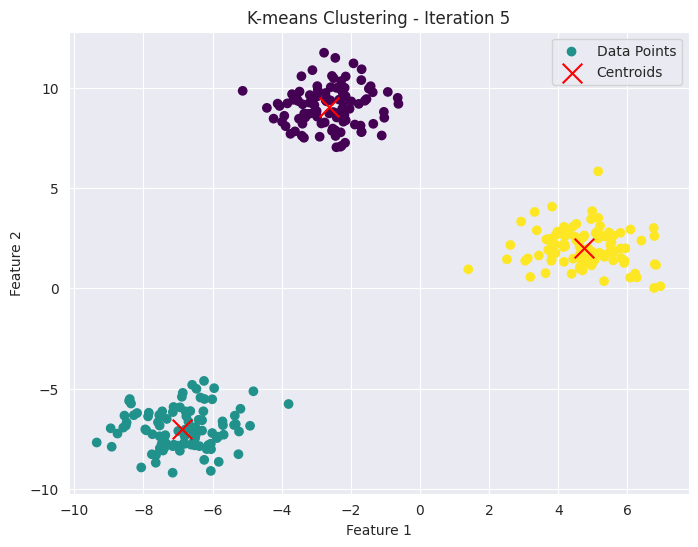

Iteration 6:
Distances:
 [[17.42111457  0.87384313 15.522625  ]
 [17.08911972  0.90100321 15.55503779]
 [ 1.5680663  15.66471908  8.65069655]
 [ 9.24334253 15.13105904  1.10996953]
 [18.06045041  2.22581816 16.87347954]
 [10.88058987 15.18849291  0.77595426]
 [ 0.46378589 17.00308591 10.23562638]
 [10.83305662 14.59225939  0.67441605]
 [ 0.41511947 16.28537982 10.31131172]
 [ 1.23795376 16.95632647 11.40356884]
 [ 1.88453686 18.24492709 11.83961524]
 [10.88521086 14.47239912  0.77187016]
 [ 2.0166206  14.7679082   8.66651771]
 [ 1.36747356 15.85622515 10.88735011]
 [17.1258718   0.75147291 15.44919326]
 [ 0.67934907 16.09521993 10.3877222 ]
 [16.92742254  1.63039491 15.9332251 ]
 [ 8.65620514 13.18442735  2.13756858]
 [ 0.96503394 17.5463038  10.7150658 ]
 [ 2.27508944 18.85328996 11.3584255 ]
 [ 1.53869539 16.15475937  8.68398631]
 [ 0.37661395 16.93483926 10.48309328]
 [10.96015562 15.29181349  0.88728556]
 [16.72268378  0.1593527  14.86028568]
 [ 0.60018235 16.01741996 10.11627427]


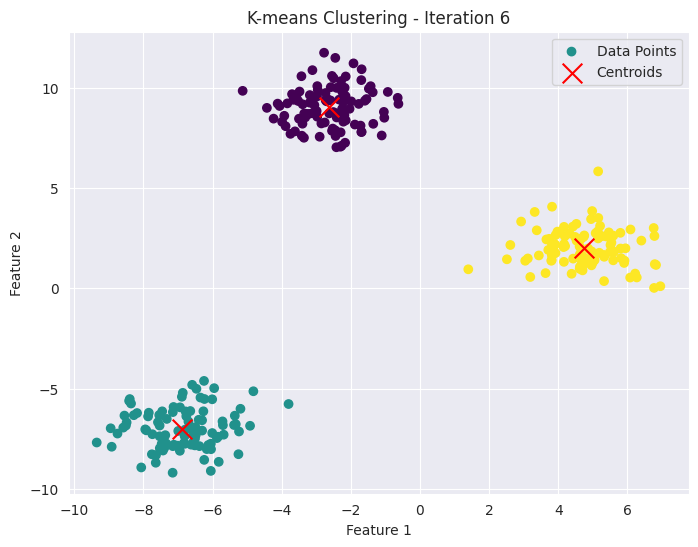

Iteration 7:
Distances:
 [[17.42111457  0.87384313 15.522625  ]
 [17.08911972  0.90100321 15.55503779]
 [ 1.5680663  15.66471908  8.65069655]
 [ 9.24334253 15.13105904  1.10996953]
 [18.06045041  2.22581816 16.87347954]
 [10.88058987 15.18849291  0.77595426]
 [ 0.46378589 17.00308591 10.23562638]
 [10.83305662 14.59225939  0.67441605]
 [ 0.41511947 16.28537982 10.31131172]
 [ 1.23795376 16.95632647 11.40356884]
 [ 1.88453686 18.24492709 11.83961524]
 [10.88521086 14.47239912  0.77187016]
 [ 2.0166206  14.7679082   8.66651771]
 [ 1.36747356 15.85622515 10.88735011]
 [17.1258718   0.75147291 15.44919326]
 [ 0.67934907 16.09521993 10.3877222 ]
 [16.92742254  1.63039491 15.9332251 ]
 [ 8.65620514 13.18442735  2.13756858]
 [ 0.96503394 17.5463038  10.7150658 ]
 [ 2.27508944 18.85328996 11.3584255 ]
 [ 1.53869539 16.15475937  8.68398631]
 [ 0.37661395 16.93483926 10.48309328]
 [10.96015562 15.29181349  0.88728556]
 [16.72268378  0.1593527  14.86028568]
 [ 0.60018235 16.01741996 10.11627427]


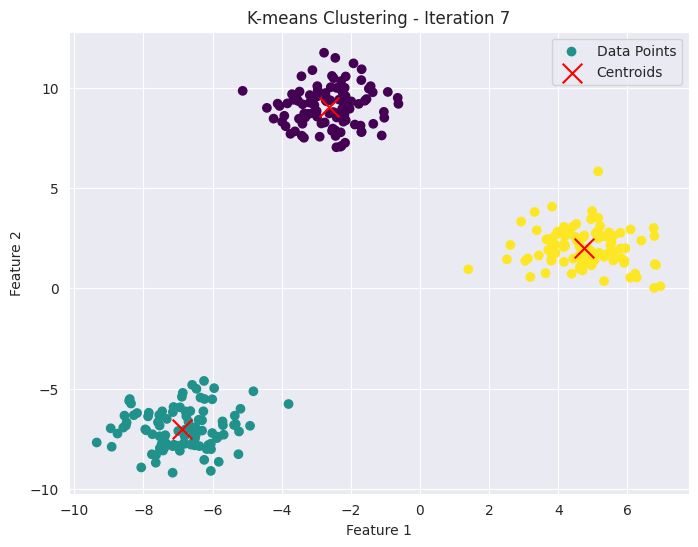

Final Assignments: [1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
Final Centroids:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set the random seed for reproducibility
np.random.seed(42)

# Generate blob-like data
num_samples = 300  # Total number of data points
num_features = 2   # Number of features (dimensions)
num_clusters = 3   # Number of clusters

# Create the data
data, labels = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_clusters, random_state=42)

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Generated Blob-like Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Initialize centroids randomly from the data points
centroids = data[np.random.choice(data.shape[0], num_clusters, replace=False)]

# Array to store cluster assignments
assign_to = np.zeros(len(data), dtype=int)

# Function to assign clusters
def assign_clusters(assign_to, distances):
    for i in range(len(distances)):
        row = distances[i]
        min_index = np.argmin(row)
        assign_to[i] = min_index

# Function to calculate distances
def calculate_distances(data, centroids):
    result = np.zeros((len(data), len(centroids)))

    for i in range(len(data)):
        data_point = data[i]
        for j in range(len(centroids)):
            centre = centroids[j]

            sq_dis = 0
            for k in range(len(data_point)):
                sq_dis += (data_point[k] - centre[k]) ** 2

            sq_dis = sq_dis ** 0.5
            result[i, j] = sq_dis

    return result

# Function to plot clusters and centroids
def plot_clusters(data, assign_to, centroids, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=assign_to, cmap='viridis', marker='o', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(f'K-means Clustering - Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Perform the K-means steps
for i in range(7):
    distances = calculate_distances(data, centroids)
    assign_clusters(assign_to, distances)
    print(f"Iteration {i+1}:")
    print("Distances:\n", distances)
    print("Assignments:", assign_to)

    # Update centroids
    for c in range(len(centroids)):
        cluster_points = data[assign_to == c]
        if len(cluster_points) > 0:
            centroids[c] = cluster_points.mean(axis=0)

    print("Updated Centroids:\n", centroids)
    print("-" * 40)

    # Plot clusters and centroids
    plot_clusters(data, assign_to, centroids, i+1)

# Print final assignments and centroids
print("Final Assignments:", assign_to)
print("Final Centroids:\n", centroids)
